<center>
    <h1><strong>ESCUELA POLITECNICA NACIONAL</strong></h1>
    <h1><strong>INGENIERIA EN CIENCIAS DE LA COMPUTACION</strong></h1>
    <h2><strong>Data Mining y Machine Learning</strong></h2>     
</center>

### Daniel Samaniego Zapata.
### GR2CC_2023-1

## Analítica Presciptiva

### Tarea 1: Importación de datos, limpieza y preprocesamiento
#### Se debe centrar en importar los datos proporcionados en un formato adecuado para que el análisis posterior sea más sencillo. También verificar si es necesario realizar alguna limpieza de datos y/o pasos de preprocesamiento.

In [162]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-pollution/PRSA_Data_Guanyuan_20130301-20170228.csv
/kaggle/input/air-pollution/PRSA_Data_Aotizhongxin_20130301-20170228.csv
/kaggle/input/air-pollution/PRSA_Data_Wanliu_20130301-20170228.csv
/kaggle/input/air-pollution/PRSA_Data_Tiantan_20130301-20170228.csv
/kaggle/input/air-pollution/PRSA_Data_Wanshouxigong_20130301-20170228.csv
/kaggle/input/air-pollution/PRSA_Data_Nongzhanguan_20130301-20170228.csv
/kaggle/input/air-pollution/PRSA_Data_Shunyi_20130301-20170228.csv
/kaggle/input/air-pollution/PRSA_Data_Changping_20130301-20170228.csv
/kaggle/input/air-pollution/PRSA_Data_Dingling_20130301-20170228.csv
/kaggle/input/air-pollution/PRSA_Data_Huairou_20130301-20170228.csv
/kaggle/input/air-pollution/PRSA_Data_Gucheng_20130301-20170228.csv
/kaggle/input/air-pollution/PRSA_Data_Dongsi_20130301-20170228.csv
/kaggle/input/epatable/EPA.csv


#### Creamos una función para calcular el valor de AQI de acuerdo a The EPA's table of breakpoints, del siguiente link:

#### https://en.wikipedia.org/wiki/Air_quality_index

#### Se transforman los valores de ppb o ppm a ug/m3 de acuerdo a la siguiente tabla:

#### Los siguientes valores se obtuvieron del siguiente link: 
#### https://www.breeze-technologies.de/blog/air-pollution-how-to-convert-between-mgm3-µgm3-ppm-ppb/

In [163]:
table = {
    'Air Pollutant': ["Sulphur dioxide (SO2)", "Nitrogen dioxide (NO2)", "Carbon monoxide (CO)", "Ozone (O3)"],
    'Conversion Factor': ["1 ppb = 2.62 µg/m3", "1 ppb = 1.88 µg/m3", "1 ppb = 1.15 µg/m3", "1 ppb = 1.96 µg/m3"]
}

dfTable = pd.DataFrame(table)
print(dfTable)

            Air Pollutant   Conversion Factor
0   Sulphur dioxide (SO2)  1 ppb = 2.62 µg/m3
1  Nitrogen dioxide (NO2)  1 ppb = 1.88 µg/m3
2    Carbon monoxide (CO)  1 ppb = 1.15 µg/m3
3              Ozone (O3)  1 ppb = 1.96 µg/m3


In [164]:
def calculate_aqi(concentration, pollutant):
    if pollutant == "PM10":
        breakpoints = [0, 54, 154, 254, 354, 424, 504, 604]
    elif pollutant == "SO2":
        breakpoints = [0, 91.7, 196.5, 484.7, 796.48, 1582.48, 2630.48]
    elif pollutant == "NO2":
        breakpoints = [0, 99.64, 188, 676.8, 1220.12, 2348.12, 3852.12]
    elif pollutant == "CO":
        breakpoints = [0, 5060, 10810, 14260, 17710, 34960, 57960]
    elif pollutant == "O3":
        breakpoints = [0, 105.84, 137.2, 166.6, 205.8, 392, 604]
    else:
        return "Invalid pollutant"
    
    index = [0, 50, 100, 150, 200, 300, 400, 500]
    
    for i in range(len(breakpoints) - 1):
        if concentration >= breakpoints[i] and concentration <= breakpoints[i + 1]:
            aqi = ((index[i + 1] - index[i]) / (breakpoints[i + 1] - breakpoints[i])) * (concentration - breakpoints[i]) + index[i]
            return round(aqi)
    
    return 500

#### Leemos los archivos .csv

In [165]:
ruta1 = "../Proyecto 2/data/PRSA_Data_Aotizhongxin_20130301-20170228.csv"
ruta2 = "../Proyecto 2/data/PRSA_Data_Changping_20130301-20170228.csv"
ruta3 = "../Proyecto 2/dataPRSA_Data_Dingling_20130301-20170228.csv"
ruta4 = "../Proyecto 2/data/PRSA_Data_Dongsi_20130301-20170228.csv"
ruta5 = "../Proyecto 2/data/PRSA_Data_Guanyuan_20130301-20170228.csv"
ruta6 = "../Proyecto 2/data/PRSA_Data_Gucheng_20130301-20170228.csv"
ruta7 = "../Proyecto 2/data/PRSA_Data_Huairou_20130301-20170228.csv"
ruta8 = "../Proyecto 2/data/PRSA_Data_Nongzhanguan_20130301-20170228.csv"
ruta9 = "../Proyecto 2/data/PRSA_Data_Shunyi_20130301-20170228.csv"
ruta10 = "../Proyecto 2/data/PRSA_Data_Tiantan_20130301-20170228.csv"
ruta11 = "../Proyecto 2/data/PRSA_Data_Wanliu_20130301-20170228.csv"
ruta12 = "../Proyecto 2/data/PRSA_Data_Wanshouxigong_20130301-20170228.csv"

#ruta1 = "/kaggle/input/air-pollution/PRSA_Data_Aotizhongxin_20130301-20170228.csv"
#ruta2 = "/kaggle/input/air-pollution/PRSA_Data_Changping_20130301-20170228.csv"
#ruta3 = "/kaggle/input/air-pollution/PRSA_Data_Dingling_20130301-20170228.csv"
#ruta4 = "/kaggle/input/air-pollution/PRSA_Data_Dongsi_20130301-20170228.csv"
#ruta5 = "/kaggle/input/air-pollution/PRSA_Data_Guanyuan_20130301-20170228.csv"
#ruta6 = "/kaggle/input/air-pollution/PRSA_Data_Gucheng_20130301-20170228.csv"
#ruta7 = "/kaggle/input/air-pollution/PRSA_Data_Huairou_20130301-20170228.csv"
#ruta8 = "/kaggle/input/air-pollution/PRSA_Data_Nongzhanguan_20130301-20170228.csv"
#ruta9 = "/kaggle/input/air-pollution/PRSA_Data_Shunyi_20130301-20170228.csv"
#ruta10 = "/kaggle/input/air-pollution/PRSA_Data_Tiantan_20130301-20170228.csv"
#ruta11 = "/kaggle/input/air-pollution/PRSA_Data_Wanliu_20130301-20170228.csv"
#ruta12 = "/kaggle/input/air-pollution/PRSA_Data_Wanshouxigong_20130301-20170228.csv"


dfr1 = pd.read_csv(ruta1)
dfr2 = pd.read_csv(ruta2)
dfr3 = pd.read_csv(ruta3)
dfr4 = pd.read_csv(ruta4)
dfr5 = pd.read_csv(ruta5)
dfr6 = pd.read_csv(ruta6)
dfr7 = pd.read_csv(ruta7)
dfr8 = pd.read_csv(ruta8)
dfr9 = pd.read_csv(ruta9)
dfr10 = pd.read_csv(ruta10)
dfr11 = pd.read_csv(ruta11)
dfr12 = pd.read_csv(ruta12)

datos = pd.concat([dfr1, dfr2, dfr3, dfr4, dfr5, dfr6, dfr7, dfr8, dfr9, dfr10, dfr11, dfr12], axis=0)

print(datos)

          No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
1          2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
2          3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
3          4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
4          5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
35059  35060  2017      2   28    19   11.0  32.0   3.0  24.0  400.0  72.0   
35060  35061  2017      2   28    20   13.0  32.0   3.0  41.0  500.0  50.0   
35061  35062  2017      2   28    21   14.0  28.0   4.0  38.0  500.0  54.0   
35062  35063  2017      2   28    22   12.0  23.0   4.0  30.0  400.0  59.0   
35063  35064  2017      2   28    23   13.0  19.0   4.0  38.0  600.0  49.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM        station  
0  

#### Eliminamos filas con datos vacíos y columnas que no vamos a utilizar.

In [166]:
# Elimina las filas con datos vacíos o NA
datosLimpio = datos.dropna()

# Eliminar columnas
columnasBorrar = ["No", "hour", "PM2.5", "TEMP", "PRES", "DEWP", "RAIN", "wd", "WSPM"]
df = datosLimpio.drop(columns=columnasBorrar)

print(df)

       year  month  day  PM10   SO2   NO2     CO    O3        station
0      2013      3    1   4.0   4.0   7.0  300.0  77.0   Aotizhongxin
1      2013      3    1   8.0   4.0   7.0  300.0  77.0   Aotizhongxin
2      2013      3    1   7.0   5.0  10.0  300.0  73.0   Aotizhongxin
3      2013      3    1   6.0  11.0  11.0  300.0  72.0   Aotizhongxin
4      2013      3    1   3.0  12.0  12.0  300.0  72.0   Aotizhongxin
...     ...    ...  ...   ...   ...   ...    ...   ...            ...
35059  2017      2   28  32.0   3.0  24.0  400.0  72.0  Wanshouxigong
35060  2017      2   28  32.0   3.0  41.0  500.0  50.0  Wanshouxigong
35061  2017      2   28  28.0   4.0  38.0  500.0  54.0  Wanshouxigong
35062  2017      2   28  23.0   4.0  30.0  400.0  59.0  Wanshouxigong
35063  2017      2   28  19.0   4.0  38.0  600.0  49.0  Wanshouxigong

[382168 rows x 9 columns]


#### Comprobamos si hay valores nulos o NA

In [167]:
df.isnull().sum()

year       0
month      0
day        0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
station    0
dtype: int64

#### Agrupamos las columna year, month y day en una sola columna (date)

In [168]:
df.insert(0, "date", df[['year', 'month', 'day']].apply(lambda x: '-'.join(x.astype(str)), axis=1))
df = df.drop(columns=['year', 'month', 'day'])

print(df)

            date  PM10   SO2   NO2     CO    O3        station
0       2013-3-1   4.0   4.0   7.0  300.0  77.0   Aotizhongxin
1       2013-3-1   8.0   4.0   7.0  300.0  77.0   Aotizhongxin
2       2013-3-1   7.0   5.0  10.0  300.0  73.0   Aotizhongxin
3       2013-3-1   6.0  11.0  11.0  300.0  72.0   Aotizhongxin
4       2013-3-1   3.0  12.0  12.0  300.0  72.0   Aotizhongxin
...          ...   ...   ...   ...    ...   ...            ...
35059  2017-2-28  32.0   3.0  24.0  400.0  72.0  Wanshouxigong
35060  2017-2-28  32.0   3.0  41.0  500.0  50.0  Wanshouxigong
35061  2017-2-28  28.0   4.0  38.0  500.0  54.0  Wanshouxigong
35062  2017-2-28  23.0   4.0  30.0  400.0  59.0  Wanshouxigong
35063  2017-2-28  19.0   4.0  38.0  600.0  49.0  Wanshouxigong

[382168 rows x 7 columns]


#### Damos formato a la columna "date", YYYY-MM-DD para poder manejar de mejor manera los datos.

In [169]:
# Convertir la columna "date" a tipo de dato datetime
df['date'] = pd.to_datetime(df['date'])

# Modificar el formato de la columna "date"
df['date'] = df['date'].dt.strftime("%Y-%m-%d")

print(df.head(10))

         date  PM10   SO2   NO2     CO    O3       station
0  2013-03-01   4.0   4.0   7.0  300.0  77.0  Aotizhongxin
1  2013-03-01   8.0   4.0   7.0  300.0  77.0  Aotizhongxin
2  2013-03-01   7.0   5.0  10.0  300.0  73.0  Aotizhongxin
3  2013-03-01   6.0  11.0  11.0  300.0  72.0  Aotizhongxin
4  2013-03-01   3.0  12.0  12.0  300.0  72.0  Aotizhongxin
5  2013-03-01   5.0  18.0  18.0  400.0  66.0  Aotizhongxin
6  2013-03-01   3.0  18.0  32.0  500.0  50.0  Aotizhongxin
7  2013-03-01   6.0  19.0  41.0  500.0  43.0  Aotizhongxin
8  2013-03-01   6.0  16.0  43.0  500.0  45.0  Aotizhongxin
9  2013-03-01   8.0  12.0  28.0  400.0  59.0  Aotizhongxin


#### Agrupamos por date y calculamos la media para las columnas PM10, SO2, NO2 y el maximo para CO y O3.

In [170]:
# Realizamos la agrupación y cálculos
df1 = df.groupby(['date', 'station']).agg({'PM10': 'mean', 'SO2': 'mean', 'NO2': 'mean', 'CO': 'max', 'O3': 'max'}).reset_index().round(3)

print(df1.head(10))

         date       station    PM10     SO2     NO2      CO    O3
0  2013-03-01  Aotizhongxin  10.750  11.708  22.583   700.0  77.0
1  2013-03-01     Changping  18.958  16.042  15.333   700.0  94.0
2  2013-03-01      Dingling   7.250   3.000   2.625   300.0  84.0
3  2013-03-01        Dongsi  10.667   8.714  29.571   700.0  92.0
4  2013-03-01      Guanyuan  11.667   8.500  28.500   600.0  79.0
5  2013-03-01       Gucheng  26.000  14.000  14.250  1200.0  61.0
6  2013-03-01       Huairou  14.316  18.474  12.895   800.0  91.0
7  2013-03-01  Nongzhanguan  10.833   9.250  27.708   600.0  89.0
8  2013-03-01        Shunyi   8.857   3.000  13.667   500.0  78.0
9  2013-03-01       Tiantan  14.458   8.875  21.583   800.0  83.0


#### Calculamos el AQI de cada gas haciendo uso de la función lambda.

In [171]:
def calculate_aqi_df(df):
    df['AQI_PM10'] = df.apply(lambda row: calculate_aqi(row['PM10'], "PM10"), axis=1)
    df['AQI_SO2'] = df.apply(lambda row: calculate_aqi(row['SO2'], "SO2"), axis=1)
    df['AQI_NO2'] = df.apply(lambda row: calculate_aqi(row['NO2'], "NO2"), axis=1)
    df['AQI_CO'] = df.apply(lambda row: calculate_aqi(row['CO'], "CO"), axis=1)
    df['AQI_O3'] = df.apply(lambda row: calculate_aqi(row['O3'], "O3"), axis=1)

calculate_aqi_df(df1)
print(df1.head(15))

          date        station    PM10     SO2     NO2      CO    O3  AQI_PM10  \
0   2013-03-01   Aotizhongxin  10.750  11.708  22.583   700.0  77.0        10   
1   2013-03-01      Changping  18.958  16.042  15.333   700.0  94.0        18   
2   2013-03-01       Dingling   7.250   3.000   2.625   300.0  84.0         7   
3   2013-03-01         Dongsi  10.667   8.714  29.571   700.0  92.0        10   
4   2013-03-01       Guanyuan  11.667   8.500  28.500   600.0  79.0        11   
5   2013-03-01        Gucheng  26.000  14.000  14.250  1200.0  61.0        24   
6   2013-03-01        Huairou  14.316  18.474  12.895   800.0  91.0        13   
7   2013-03-01   Nongzhanguan  10.833   9.250  27.708   600.0  89.0        10   
8   2013-03-01         Shunyi   8.857   3.000  13.667   500.0  78.0         8   
9   2013-03-01        Tiantan  14.458   8.875  21.583   800.0  83.0        13   
10  2013-03-01         Wanliu  14.000  11.952  33.952   700.0  61.0        13   
11  2013-03-01  Wanshouxigon

#### Calculamos el AQI final, de los valores de cada Gas. 

In [172]:
# Calcular la columna AQI como el máximo de AQI_PM10, AQI_SO2, AQI_NO2, AQI_CO, AQI_O3
df1['AQI'] = df1[['AQI_PM10', 'AQI_SO2', 'AQI_NO2', 'AQI_CO', 'AQI_O3']].max(axis=1)

# Imprimir los 15 primeros valores del DataFrame resultante
print(df1.head(15))

          date        station    PM10     SO2     NO2      CO    O3  AQI_PM10  \
0   2013-03-01   Aotizhongxin  10.750  11.708  22.583   700.0  77.0        10   
1   2013-03-01      Changping  18.958  16.042  15.333   700.0  94.0        18   
2   2013-03-01       Dingling   7.250   3.000   2.625   300.0  84.0         7   
3   2013-03-01         Dongsi  10.667   8.714  29.571   700.0  92.0        10   
4   2013-03-01       Guanyuan  11.667   8.500  28.500   600.0  79.0        11   
5   2013-03-01        Gucheng  26.000  14.000  14.250  1200.0  61.0        24   
6   2013-03-01        Huairou  14.316  18.474  12.895   800.0  91.0        13   
7   2013-03-01   Nongzhanguan  10.833   9.250  27.708   600.0  89.0        10   
8   2013-03-01         Shunyi   8.857   3.000  13.667   500.0  78.0         8   
9   2013-03-01        Tiantan  14.458   8.875  21.583   800.0  83.0        13   
10  2013-03-01         Wanliu  14.000  11.952  33.952   700.0  61.0        13   
11  2013-03-01  Wanshouxigon

### Tarea 2: Análisis exploratorio de datos

#### Resumir y visualizar los datos de las formas útiles. Los estudiantes deben pensar en preguntas interesantes que se podrían comprobar con los datos disponibles y dar respuestas textuales o mediante visualización de datos.

#### Segun el valor del AQI Final, se define el nivel de la contaminación del Aire.

In [173]:
# Definir los rangos y textos correspondientes
rangos = [0, 50, 100, 150, 200, 250, 300, 800]
calidadAire = ["Excellent", "Good", "Slightly Polluted", "Lightly Polluted", "Moderately Polluted", "Heavily Polluted", "Severely Polluted"]

# Crear nueva columna en df1
df1['Air_Pollution_Level'] = pd.cut(df1['AQI'], bins=rangos, labels=calidadAire, include_lowest=True)

# Imprimir el DataFrame resultante
print(df1.head(15))

          date        station    PM10     SO2     NO2      CO    O3  AQI_PM10  \
0   2013-03-01   Aotizhongxin  10.750  11.708  22.583   700.0  77.0        10   
1   2013-03-01      Changping  18.958  16.042  15.333   700.0  94.0        18   
2   2013-03-01       Dingling   7.250   3.000   2.625   300.0  84.0         7   
3   2013-03-01         Dongsi  10.667   8.714  29.571   700.0  92.0        10   
4   2013-03-01       Guanyuan  11.667   8.500  28.500   600.0  79.0        11   
5   2013-03-01        Gucheng  26.000  14.000  14.250  1200.0  61.0        24   
6   2013-03-01        Huairou  14.316  18.474  12.895   800.0  91.0        13   
7   2013-03-01   Nongzhanguan  10.833   9.250  27.708   600.0  89.0        10   
8   2013-03-01         Shunyi   8.857   3.000  13.667   500.0  78.0         8   
9   2013-03-01        Tiantan  14.458   8.875  21.583   800.0  83.0        13   
10  2013-03-01         Wanliu  14.000  11.952  33.952   700.0  61.0        13   
11  2013-03-01  Wanshouxigon

#### Agrupamos los datos por 'station' y 'Air_Pollution_Level' y calculamos la media del AQI.

In [174]:
df_groupP = df1.groupby(['station', 'Air_Pollution_Level'])['AQI'].mean().reset_index()

#### Creamos un gráfico de barras utilizando Seaborn, en donde se muestra la media del AQI agrupado por nivel de contaminación del aire.

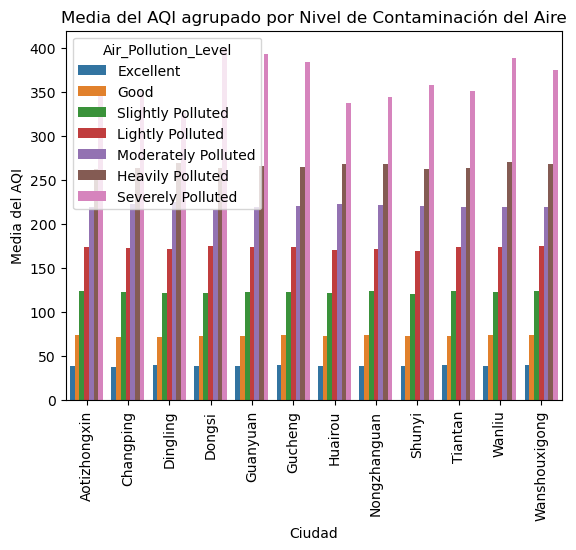

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='station', y='AQI', hue='Air_Pollution_Level', data=df_groupP)
plt.xlabel('Ciudad')
plt.ylabel('Media del AQI')
plt.title('Media del AQI agrupado por Nivel de Contaminación del Aire')
plt.xticks(rotation='vertical')
plt.show()


#### Tarea 3: Modelado predictivo

#### Se debe definir una tarea predictiva que pueda ayudar a predecir la contaminación del aire, a través del valor del AQI o del Nivel de Contaminación del Aire, en función de sus características. Después de definir la tarea, se debe utilizar los datos disponibles para seleccionar y obtener un buen modelo para esta tarea. Se debe justificar el modelo sugerido

#### Splitting the data

In [179]:
df2 = df1[df1["station"] == "Changping"]

from sklearn.model_selection import train_test_split

# Dividir el dataframe en características X y variable objetivo y
X = df2[['AQI_PM10', 'AQI_SO2', 'AQI_NO2', 'AQI_CO', 'AQI_O3']]
y = df2['Air_Pollution_Level']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#### Training and testing

In [180]:
from sklearn.svm import SVC

# Crear modelo de Support Vector Classifier
model = SVC(C=10,kernel='rbf')
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

#### Selecting and Computing evaluation metrics

In [181]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.953810623556582
Precision: 0.953810623556582
Recall: 0.953810623556582
F1 Score: 0.953810623556582


#### Cross-validation

In [182]:
from sklearn.model_selection import cross_val_score

# Example of cross-validation using 5 folds
scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())

Cross-Validation Scores: [0.96193772 0.9550173  0.95833333 0.95486111 0.95138889]
Average Accuracy: 0.9563076701268743


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


#### Hyperparameter tuning

In [183]:
from sklearn.model_selection import GridSearchCV

# Example of hyperparameter tuning using grid search
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print('Best parameters', best_params)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best parameters {'C': 10, 'kernel': 'rbf'}


#### Definimos funciones para predecir el nivel de contaminación del aire en función de ciertas variables (PM10, SO2, NO2, CO, O3). 

In [184]:
def predict_air_pollution_level(Pm10,So2,No2,Co,O3,mode=0):
    df_test = pd.DataFrame({
        'PM10': [Pm10],
        'SO2': [So2],
        'NO2': [No2],
        'CO': [Co],
        'O3': [O3]
        })
    
    if mode == 0:
        calculate_aqi_df(df_test)
        df_test = df_test[['AQI_PM10','AQI_SO2','AQI_NO2','AQI_CO','AQI_O3']].head(1)

    print(df_test)
    return model.predict(df_test)

def predict_air_pollution_level_df(df_test, mode=0):    
    if mode == 0:
        calculate_aqi_df(df_test)
        df_test = df_test[['AQI_PM10','AQI_SO2','AQI_NO2','AQI_CO','AQI_O3']].head(1)

    print(df_test)
    return model.predict(df_test)

#### Filtramos las filas donde la columna "station" no es igual a 'Changping' y seleccionamos una muestra aleatoria de las filas filtradas.

In [185]:
station = 'Changping'
df_test = df1.query('station != @station').sample()

df_test

,date,station,PM10,SO2,NO2,CO,O3,AQI_PM10,AQI_SO2,AQI_NO2,AQI_CO,AQI_O3,AQI,Air_Pollution_Level
7742,2015-01-15,Dongsi,327.818,39.364,107.318,6300.0,7.0,187,21,54,61,3,187,Lightly Polluted


#### Realizamos la prediccion utilizando el modelo SVC.

In [188]:
Pm10, So2, No2, Co, O3 = 300,32,100,6230,5

df_test = df_test[['PM10','SO2','NO2','CO','O3']]

print(df_test)

predict_air_pollution_level_df(df_test)

         PM10     SO2      NO2      CO   O3
7742  327.818  39.364  107.318  6300.0  7.0
      AQI_PM10  AQI_SO2  AQI_NO2  AQI_CO  AQI_O3
7742       187       21       54      61       3


array(['Lightly Polluted'], dtype=object)